In [1]:
import pickle
import pandas as pd
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ModCorDF = pickle.load(open("../computed_data/AffCor.pickle","rb"))
ModAUCDF = pickle.load(open("../computed_data/AUCval.pickle","rb"))
ModEnrDF = pickle.load(open("../computed_data/EnrVal.pickle","rb"))
RobusValDF = pickle.load(open("../computed_data/RobusVal.pickle","rb"))
AllConcatDF = pickle.load(open("../computed_data/ConcatBench.pk","rb"))



In [3]:
#Default color
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [4]:
#Relation between AUC and COR
ModToRun = ["FoldX","RosettabetaInterfacedGseparated","dTERMenC35"]
ModToRunName = ["FoldX","Rosetta","dTERMen"]
Receps = ["B2CL1","MCL1","B2LA1"]


#ModToRun = ["FoldX","RosettabetaInterfacedGseparated","dTERMenC35","STATIUM"]
#ModToRunName = ["FoldX","Rosetta","dTERMen","STATIUM"]
#Receps = ["B2CL1","MCL1","B2LA1"]

('FoldX', 0.25, 0.78114212535280181)
('FoldX', 0.75, 0.46670405731625025)
('FoldX', 1.5, 0.46163348874233701)
('FoldX', 4.0, 0.31430480602076061)
('RosettabetaInterfacedGseparated', 0.25, 0.62110664646517921)
('RosettabetaInterfacedGseparated', 0.75, 0.59257953494206439)
('RosettabetaInterfacedGseparated', 1.5, 0.34929842646792908)
('RosettabetaInterfacedGseparated', 4.0, 0.19511200928141539)
('dTERMenC35', 0.25, 0.84955632307659812)
('dTERMenC35', 0.75, 0.74099090140536561)
('dTERMenC35', 1.5, 0.58693636155292794)
('dTERMenC35', 4.0, 0.4631183052972313)


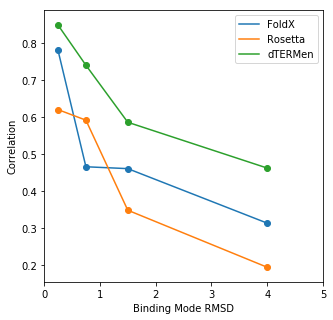

In [5]:
figsize(5,5)

Bin = [0,0.5,1.0,2.0,6.0]

BelowOne = []
Thresh = 1.0
for (t,name,c) in zip(ModToRun,ModToRunName,new_colors):
    x = []
    y = []
    ind = RobusValDF["rmsd"].values < Thresh
    BelowOne.append(RobusValDF[t].values[ind])
    for i in range(1,len(Bin)):
        ind = (RobusValDF["rmsd"].values < Bin[i]) & (RobusValDF["rmsd"].values >= Bin[i-1])
        sub = RobusValDF[t].values[ind]
        xi = (Bin[i]+Bin[i-1])/2.0
        yi = np.mean(sub)
        ystd = np.std(sub)
        plt.scatter(xi,yi,c=c)
        print(t,xi,yi)
        #plt.plot([xi,xi],[yi+ystd,yi-ystd],c=c)
        #plt.plot([xi-0.05,xi+0.05],[yi+ystd,yi+ystd],c=c)
        #plt.plot([xi-0.05,xi+0.05],[yi-ystd,yi-ystd],c=c)
        #plt.scatter((,np.mean(sub),c=c)
        
        x.append(xi)
        y.append(yi)
    plt.plot(x,y,c=c,label=name)
plt.xlabel("Binding Mode RMSD")    
plt.ylabel("Correlation")
plt.legend(loc=0)
plt.xlim([0,5])
plt.show()



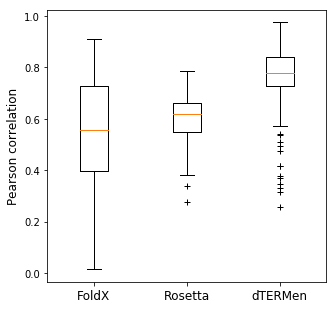

[ 0.54873138  0.60002139  0.76931232]
299


In [7]:
#Make figure for Plos Comp
plt.boxplot(BelowOne,sym='+')
plt.xticks(range(1,len(ModToRunName)+1),ModToRunName,size=12)
plt.ylabel("Pearson correlation",size=12)
plt.savefig("../Figures/Figure1.tiff",dpi=300,format="TIFF")
plt.show()
print(np.mean(BelowOne,axis=1))
print(len(BelowOne[0]))

In [8]:
RobusValDF.filter(regex="5C6H",axis=0)["rmsd"].describe()

count    209.000000
mean       0.657206
std        0.245577
min        0.213849
25%        0.541446
50%        0.664573
75%        0.736402
max        1.396146
Name: rmsd, dtype: float64

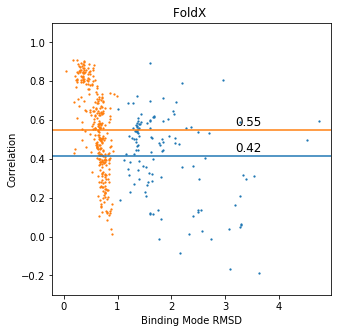

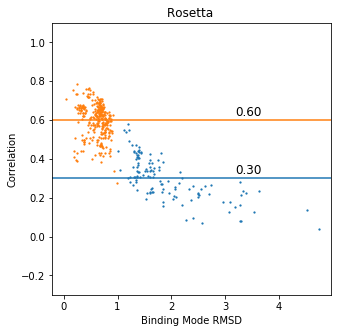

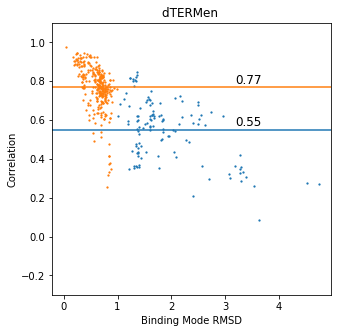

In [9]:

Thres = 1

for (t,name) in zip(ModToRun,ModToRunName):
    lowind = RobusValDF["rmsd"].values < Thres
    higind = RobusValDF["rmsd"].values >= Thres
    
    #Plot high
    plt.scatter(RobusValDF["rmsd"].values[higind],RobusValDF[t].values[higind],c=new_colors[0],s=1.5)
    #Plot low
    plt.scatter(RobusValDF["rmsd"].values[lowind],RobusValDF[t].values[lowind],c=new_colors[1],s=1.5)
    
    #Plot some line
    plt.axhline(np.mean(RobusValDF[t].values[higind]),c=new_colors[0])
    plt.axhline(np.mean(RobusValDF[t].values[lowind]),c=new_colors[1])
    
    #Plot text
    plt.text(3.2,np.mean(RobusValDF[t].values[higind])+0.02,"%.2f" % (np.mean(RobusValDF[t].values[higind])),size='large')
    plt.text(3.2,np.mean(RobusValDF[t].values[lowind])+0.02,"%.2f" % (np.mean(RobusValDF[t].values[lowind])),size='large')
    
    plt.ylim([-0.3,1.1])
    plt.title("%s " % (name))
    plt.xlabel("Binding Mode RMSD")
    plt.ylabel("Correlation")
    plt.show()


In [10]:
#Get average performance

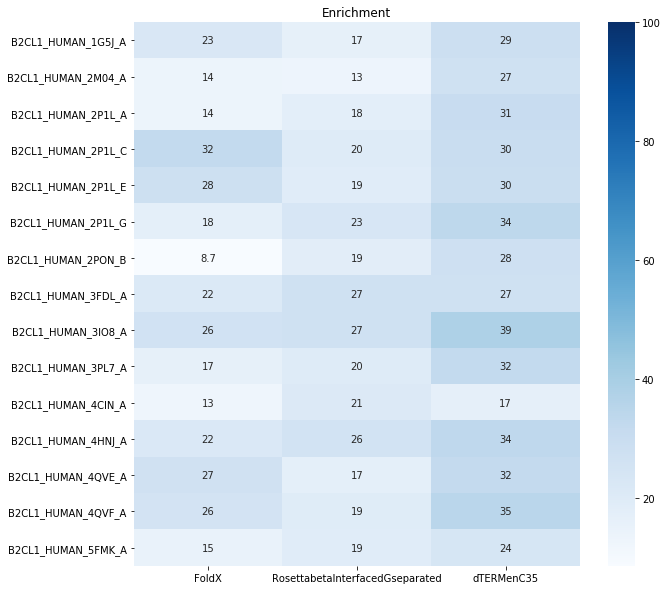

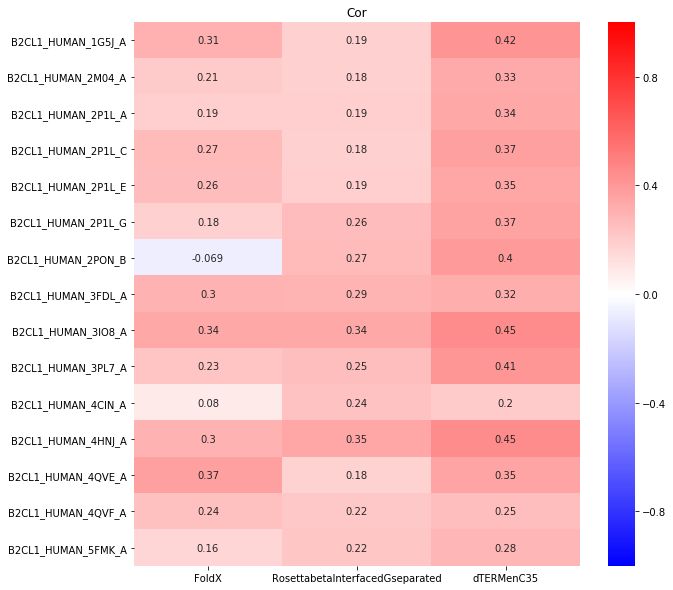

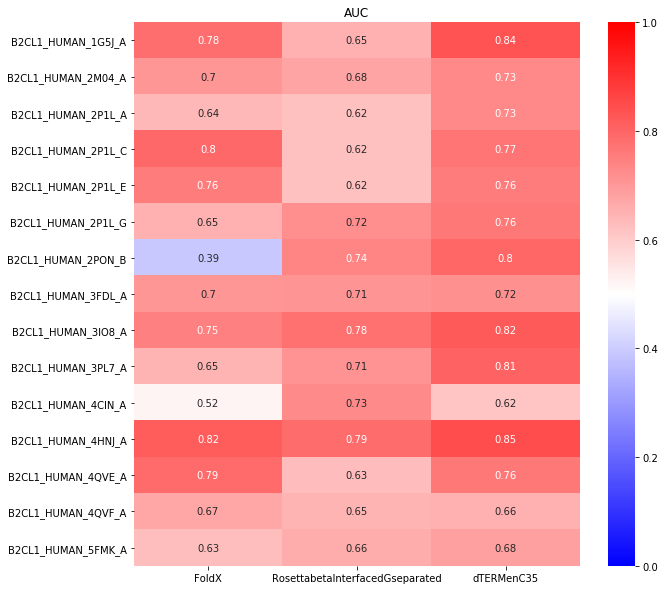

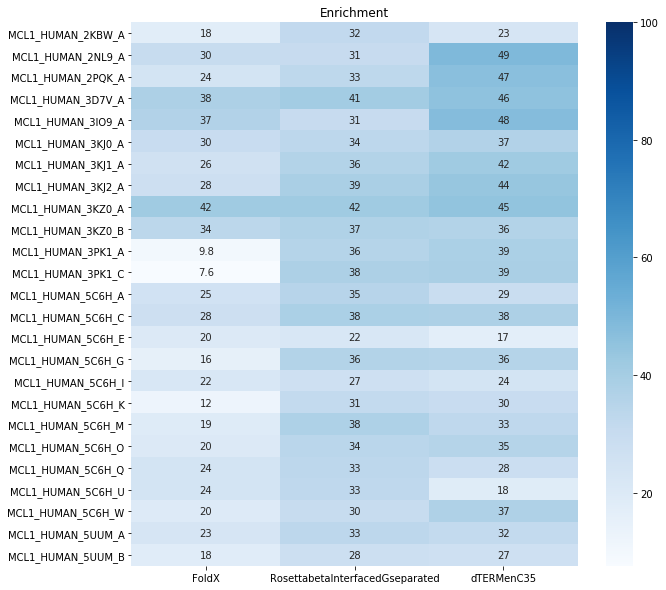

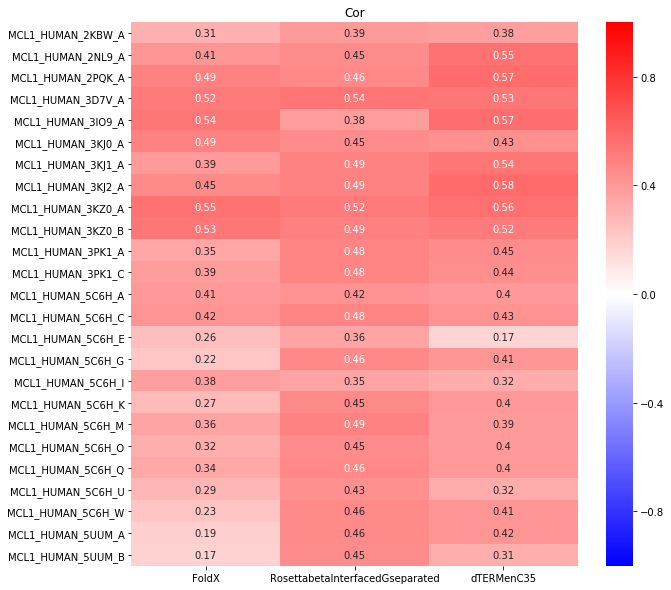

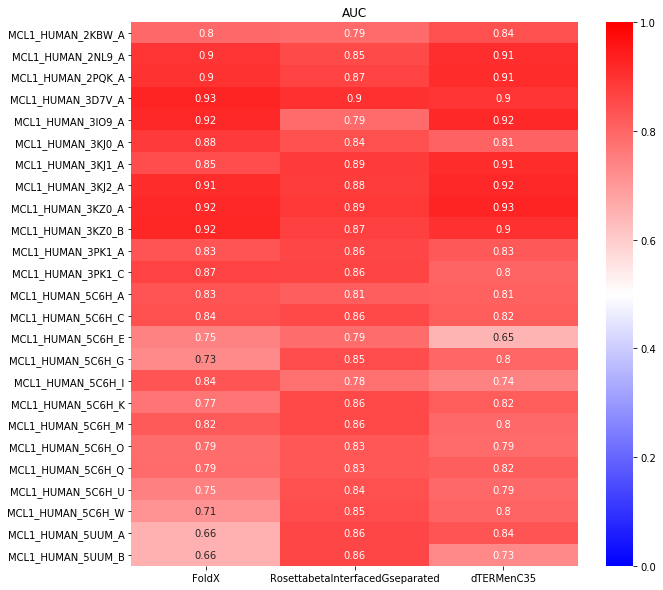

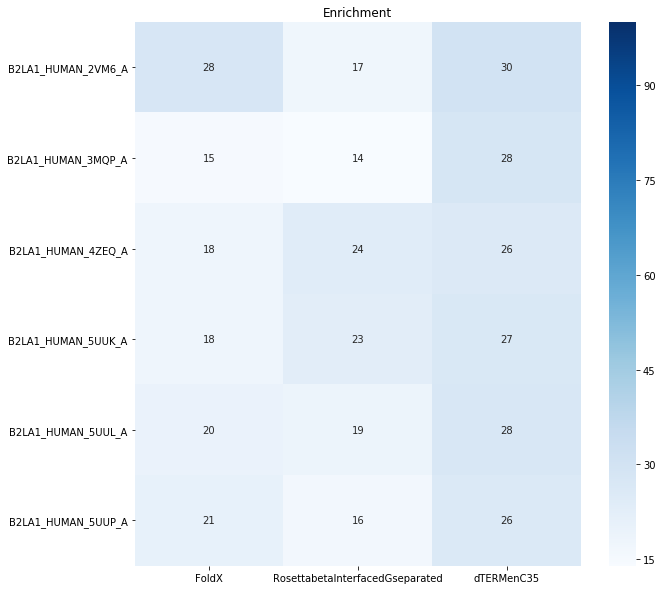

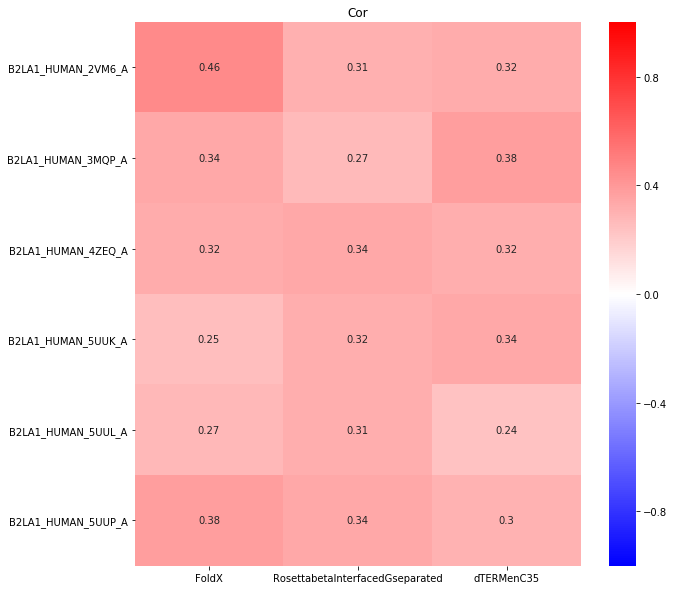

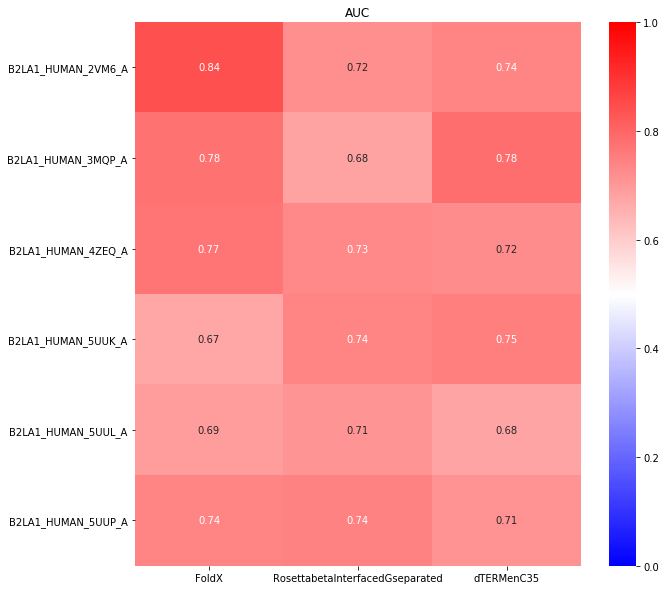

In [11]:
SummarPer = dict()
figsize(10,10)
for recep in Receps:
    AUCsubdf = ModAUCDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    CORsubdf = ModCorDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    ENRsubdf = ModEnrDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    
    #sns.heatmap(CORsubdf[ModToRun],cmap="seismic",center=0.0,vmin=-1.0,vmax=1.0,annot=True)
    #plt.show()
    sns.heatmap(ENRsubdf[ModToRun],cmap="Blues",vmax=100.0,annot=True)
    plt.title("Enrichment")
    plt.show()
    
    sns.heatmap(CORsubdf[ModToRun],cmap="bwr",vmax=1.0,vmin=-1.0,annot=True,center=0)
    plt.title("Cor")
    plt.show()
    
    sns.heatmap(AUCsubdf[ModToRun],cmap="bwr",vmax=1.0,vmin=0,annot=True,center=0.5)
    plt.title("AUC")
    plt.show()
    
    
    for (mod,name) in zip(ModToRun,ModToRunName):
        scor = np.corrcoef(AUCsubdf[mod],CORsubdf[mod])[0][1]
        if name+"_mean" not in SummarPer:
            SummarPer[name+"_mean"] = dict()
        SummarPer[name+"_mean"][recep+"_cor"] = np.mean(CORsubdf[mod])
        SummarPer[name+"_mean"][recep+"_AUC"] = np.mean(AUCsubdf[mod])
        SummarPer[name+"_mean"][recep+"_Enrich"] = np.mean(ENRsubdf[mod])
        
        #SummarPer[name+"_mean"][recep+"_cor_sd"] = np.std(CORsubdf[mod])
        #SummarPer[name+"_mean"][recep+"_AUC_sd"] = np.std(AUCsubdf[mod])
        #SummarPer[name+"_mean"][recep+"_Enrich_sd"] = np.std(ENRsubdf[mod])
        
        
    AUCsubdf = ModAUCDF.filter(regex=recep+".*"+"MIN",axis=0)
    CORsubdf = ModCorDF.filter(regex=recep+".*"+"MIN",axis=0)
    ENRsubdf = ModEnrDF.filter(regex=recep+".*"+"MIN",axis=0)
    for (mod,name) in zip(ModToRun,ModToRunName):
        if name+"_min" not in SummarPer:
            SummarPer[name+"_min"] = dict()
        SummarPer[name+"_min"][recep+"_cor"] = np.mean(CORsubdf[mod])
        SummarPer[name+"_min"][recep+"_AUC"] = np.mean(AUCsubdf[mod])
        SummarPer[name+"_min"][recep+"_Enrich"] = np.mean(ENRsubdf[mod])
            


In [13]:
SummaryPerDF = pd.DataFrame(SummarPer).transpose()
SummaryPerDF["mean_AUC"] = SummaryPerDF.filter(regex="_AUC").mean(axis=1)
SummaryPerDF["mean_cor"] = SummaryPerDF.filter(regex="_cor").mean(axis=1)
SummaryPerDF["mean_Enrich"] = SummaryPerDF.filter(regex="_Enrich").mean(axis=1)


SummaryPerDF["sd_AUC"] = SummaryPerDF.filter(regex="_AUC").std(axis=1)
SummaryPerDF["sd_cor"] = SummaryPerDF.filter(regex="_cor").std(axis=1)
SummaryPerDF["sd_Enrich"] = SummaryPerDF.filter(regex="_Enrich").std(axis=1)

In [14]:
SummaryPerDF.to_csv("../computed_data/Summary.csv")

In [15]:
SummaryPerDF.filter(regex="mean_")

,mean_AUC,mean_cor,mean_Enrich
FoldX_mean,0.751714,0.311641,21.377008
FoldX_min,0.855653,0.471359,29.141456
Rosetta_mean,0.752156,0.335921,24.443816
Rosetta_min,0.783386,0.373168,26.037904
dTERMen_mean,0.772331,0.368573,30.848460
dTERMen_min,0.804637,0.408427,35.606232


In [16]:
SummaryPerDF.filter(regex="_Enrich").filter(regex="mean",axis=0)

,B2CL1_Enrich,B2LA1_Enrich,MCL1_Enrich,mean_Enrich,sd_Enrich
FoldX_mean,20.322237,19.929917,23.878869,21.377008,1.776318
Rosetta_mean,20.448095,18.961567,33.921786,24.443816,6.729358
dTERMen_mean,29.882961,27.507665,35.154754,30.848460,3.195688


In [17]:
SummaryPerDF.filter(regex="mean_").filter(regex="_min",axis=0)

,mean_AUC,mean_cor,mean_Enrich
FoldX_min,0.855653,0.471359,29.141456
Rosetta_min,0.783386,0.373168,26.037904
dTERMen_min,0.804637,0.408427,35.606232


In [18]:
SummaryPerDF.filter(regex="_min",axis=0).filter(regex="_Enrich")

,B2CL1_Enrich,B2LA1_Enrich,MCL1_Enrich,mean_Enrich,sd_Enrich
FoldX_min,27.359781,27.332457,32.732131,29.141456,2.539015
Rosetta_min,20.063839,19.973719,38.076152,26.037904,8.512407
dTERMen_min,35.339717,29.172142,42.306836,35.606232,5.365527


('B2CL1', 'FoldX', 0.22549564361774882, 0.6837182624655856)
('B2CL1', 'RosettabetaInterfacedGseparated', 0.2379466522195271, 0.6881785163430981)
('B2CL1', 'dTERMenC35', 0.35317962264524283, 0.7538526395249205)
('B2CL1', 'FoldX_MIN', 0.38996079556195107, 0.8014272473667149)
('B2CL1', 'RosettabetaInterfacedGseparated_MIN', 0.25029115795617507, 0.7042399656657065)
('B2CL1', 'dTERMenC35_MIN', 0.384428249586192, 0.7744049711674117)
('MCL1', 'FoldX', 0.3711635674198435, 0.8222256006006439)
('MCL1', 'RosettabetaInterfacedGseparated', 0.45412558979065226, 0.8472009229143868)
('MCL1', 'dTERMenC35', 0.43629777344420473, 0.8315517878946451)
('MCL1', 'FoldX_MIN', 0.5608239598928687, 0.9313250770393628)
('MCL1', 'RosettabetaInterfacedGseparated_MIN', 0.5396404231590087, 0.9192813535670679)
('MCL1', 'dTERMenC35_MIN', 0.5092513096323189, 0.8904692133263562)
('B2LA1', 'FoldX', 0.3382651787182018, 0.7491981507983079)
('B2LA1', 'RosettabetaInterfacedGseparated', 0.31568978442294704, 0.7210898371761708)


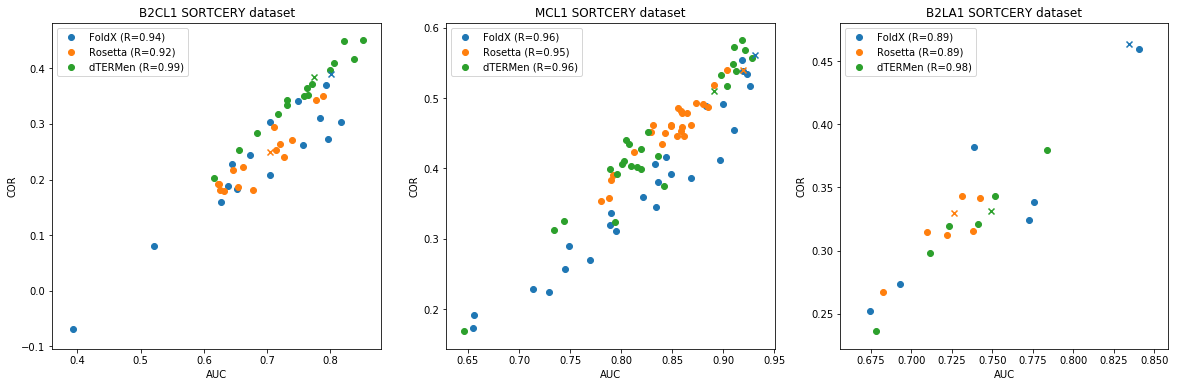

In [20]:
figsize(20,6)
plt.figure(1)
for recep in Receps:
    AUCsubdf = ModAUCDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    CORsubdf = ModCorDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    plt.subplot(1,3,Receps.index(recep)+1)
    for (mod,name,i) in zip(ModToRun,ModToRunName,range(len(ModToRun))):
        scor = np.corrcoef(AUCsubdf[mod],CORsubdf[mod])[0][1]
        plt.scatter(AUCsubdf[mod],CORsubdf[mod],label=name + " (R=%.2f)" % scor,c=new_colors[i])
        #plt.axhline(np.mean(CORsubdf[mod]))
        #plt.axvline(np.mean(AUCsubdf[mod]))
        print(recep,mod,np.mean(CORsubdf[mod]),np.mean(AUCsubdf[mod]))
    plt.legend(loc=2)
    AUCsubdf = ModAUCDF.filter(regex=recep+".*"+"MIN",axis=0)
    CORsubdf = ModCorDF.filter(regex=recep+".*"+"MIN",axis=0)
    for (mod,name,i) in zip(ModToRun,ModToRunName,range(len(ModToRun))):
        plt.scatter(AUCsubdf[mod],CORsubdf[mod],marker="x",c=new_colors[i])
        print(recep,mod+"_MIN",np.mean(CORsubdf[mod]),np.mean(AUCsubdf[mod]))
        
    plt.title(recep+" SORTCERY dataset")
   
    plt.xlabel("AUC")
    plt.ylabel("COR")
plt.show()

('B2CL1', 'FoldX', 20.32223742210062, 0.6837182624655856)
('B2CL1', 'RosettabetaInterfacedGseparated', 20.448095194323376, 0.6881785163430981)
('B2CL1', 'dTERMenC35', 29.882960936312504, 0.7538526395249205)
('B2CL1', 'FoldX_MIN', 27.359781121751027, 0.8014272473667149)
('B2CL1', 'RosettabetaInterfacedGseparated_MIN', 20.063839489284085, 0.7042399656657065)
('B2CL1', 'dTERMenC35_MIN', 35.33971728226174, 0.7744049711674117)
('MCL1', 'FoldX', 23.87886884880873, 0.8222256006006439)
('MCL1', 'RosettabetaInterfacedGseparated', 33.921786432939534, 0.8472009229143868)
('MCL1', 'dTERMenC35', 35.15475395234914, 0.8315517878946451)
('MCL1', 'FoldX_MIN', 32.73213092852371, 0.9313250770393628)
('MCL1', 'RosettabetaInterfacedGseparated_MIN', 38.07615230460922, 0.9192813535670679)
('MCL1', 'dTERMenC35_MIN', 42.30683589401024, 0.8904692133263562)
('B2LA1', 'FoldX', 19.929916776171705, 0.7491981507983079)
('B2LA1', 'RosettabetaInterfacedGseparated', 18.961567175102367, 0.7210898371761708)
('B2LA1', 'dT

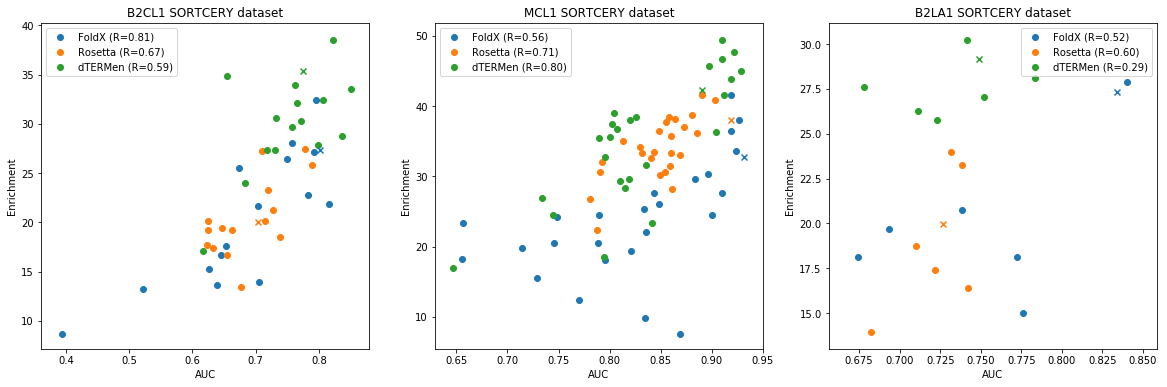

In [21]:
figsize(20,6)
plt.figure(1)
for recep in Receps:
    AUCsubdf = ModAUCDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    CORsubdf = ModEnrDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    plt.subplot(1,3,Receps.index(recep)+1)
    for (mod,name,i) in zip(ModToRun,ModToRunName,range(len(ModToRun))):
        scor = np.corrcoef(AUCsubdf[mod],CORsubdf[mod])[0][1]
        plt.scatter(AUCsubdf[mod],CORsubdf[mod],label=name + " (R=%.2f)" % scor,c=new_colors[i])
        #plt.axhline(np.mean(CORsubdf[mod]))
        #plt.axvline(np.mean(AUCsubdf[mod]))
        print(recep,mod,np.mean(CORsubdf[mod]),np.mean(AUCsubdf[mod]))
    plt.legend(loc=0)
    AUCsubdf = ModAUCDF.filter(regex=recep+".*"+"MIN",axis=0)
    CORsubdf = ModEnrDF.filter(regex=recep+".*"+"MIN",axis=0)
    for (mod,name,i) in zip(ModToRun,ModToRunName,range(len(ModToRun))):
        plt.scatter(AUCsubdf[mod],CORsubdf[mod],marker="x",c=new_colors[i])
        print(recep,mod+"_MIN",np.mean(CORsubdf[mod]),np.mean(AUCsubdf[mod]))
        
    plt.title(recep+" SORTCERY dataset")
   
    plt.xlabel("AUC")
    plt.ylabel("Enrichment")
plt.show()

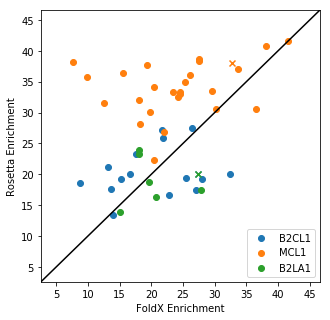

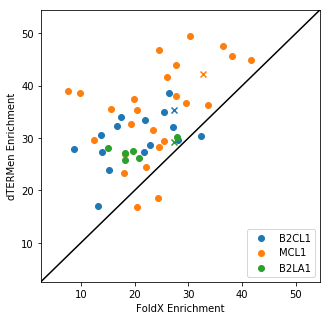

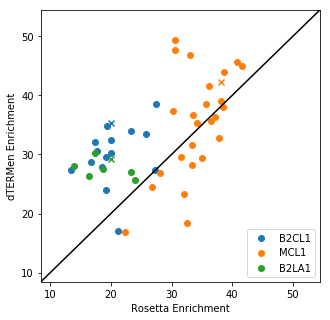

In [58]:
#Compare AUC
figsize(5,5)
for i in range(0,len(ModToRun)):
    for j in range(i+1,len(ModToRun)):
        alld = []
        allL = []
        for k in range(len(Receps)):
            recep = Receps[k]
            #AUCsubdf = ModEnrDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
            AUCsubdf = ModEnrDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
            Leg = plt.scatter(AUCsubdf[ModToRun[i]],AUCsubdf[ModToRun[j]],label=recep,c=new_colors[k])
            allL.append(Leg)
            alld += list(AUCsubdf[ModToRun[i]])
            alld += list(AUCsubdf[ModToRun[j]])
            
            AUCsubdf = ModEnrDF.filter(regex=recep+".*"+"MIN",axis=0)
            plt.scatter(AUCsubdf[ModToRun[i]],AUCsubdf[ModToRun[j]],marker="x",c=new_colors[k])
        plt.xlabel("%s Enrichment" % (ModToRunName[i]))
        plt.ylabel("%s Enrichment" % (ModToRunName[j]))
        
        minv = np.min(alld)-5
        maxv = np.max(alld)+5
        plt.xlim([minv,maxv])
        plt.ylim([minv,maxv])
        plt.plot([minv,maxv],[minv,maxv],c="black")
        plt.legend(handles=allL,loc=4)
        plt.show()

In [22]:
ToTest = ModEnrDF
ToTest = ModAUCDF
#ToTest = ModCorDF
for k in range(len(Receps)):
    recep = Receps[k]
    #AUCsubdf = ModEnrDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    AUCsubdf = ToTest.filter(regex=recep+"_HUMAN_\d+",axis=0)
    print(recep)
    print(AUCsubdf[ModToRun].idxmax(axis=1).value_counts())
    print()
print("ALL")
print(ToTest[ModToRun].idxmax(axis=1).value_counts())
print()

B2CL1
dTERMenC35                         11
FoldX                               3
RosettabetaInterfacedGseparated     1
dtype: int64
()
MCL1
RosettabetaInterfacedGseparated    12
dTERMenC35                          7
FoldX                               6
dtype: int64
()
B2LA1
RosettabetaInterfacedGseparated    2
FoldX                              2
dTERMenC35                         2
dtype: int64
()
ALL
dTERMenC35                         20
RosettabetaInterfacedGseparated    15
FoldX                              14
dtype: int64
()


In [23]:
#Relation between crystal resolution and performance

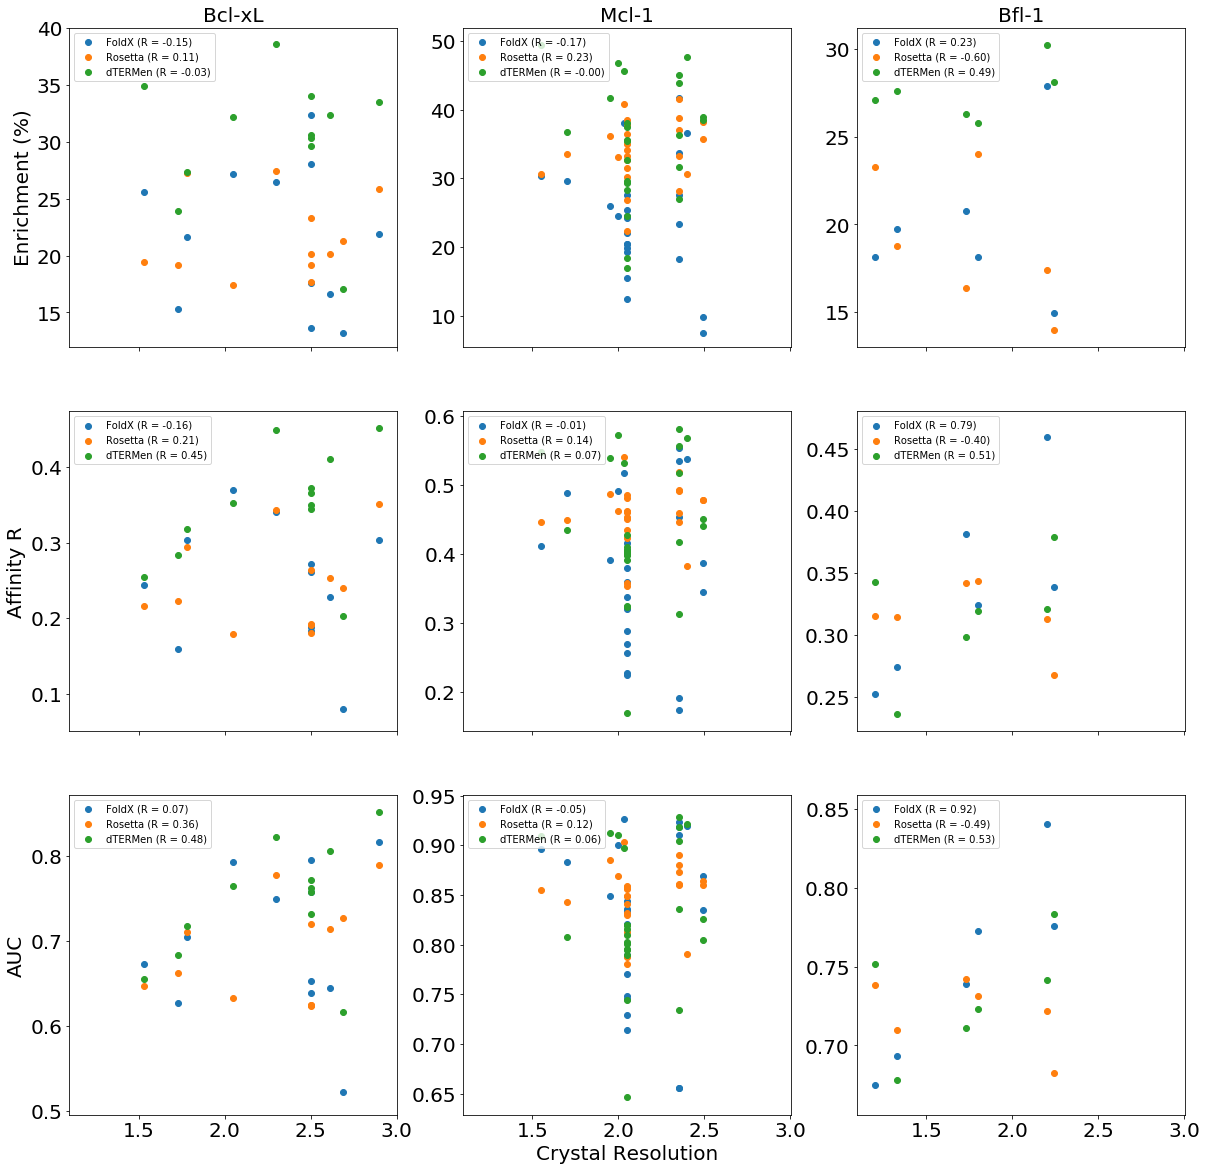

In [24]:
figsize(20,20)
fig, axes = plt.subplots(3, 3,sharex=True)
AllTest = ["Enrich_","Cor_","AUC_"]
for (test,testname) in zip(AllTest,["Enrichment (%)","Affinity R","AUC"]):
    for (recep,rname) in zip(Receps,["Bcl-xL","Mcl-1","Bfl-1"]):
        subdf = AllConcatDF[AllConcatDF["Resolution"] > 0].filter(regex=recep,axis=0)
        naxes = axes[AllTest.index(test),Receps.index(recep)]
        for (t,n) in zip(ModToRun,ModToRunName):
            k = test+t
            res = subdf["Resolution"]
            perf = subdf[k]
            lab = "%s (R = %.2f)" % (n,np.corrcoef(res,perf)[0][1])
            naxes.scatter(res,perf,label=lab)
        naxes.legend(loc=2)
        if test == "Enrich_":
            naxes.set_title(rname,size=20)
        if (rname == "Mcl-1") and (test == "AUC_"):
            naxes.set_xlabel("Crystal Resolution",size=20)
        if rname == "Bcl-xL":
            naxes.set_ylabel(testname,size=20)
        
        naxes.tick_params(labelsize=20)
        #naxes.show()
plt.savefig("../Figures/Supp_perf_vs_res.tiff",format="TIFF",dpi=75)
#AllConcatDF["Resolution"]